In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [2]:
data=pd.read_csv('index2018.csv')
df=data.copy()

In [3]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df.shape

(6269, 5)

In [22]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [23]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [24]:
from matplotlib import pyplot as plt

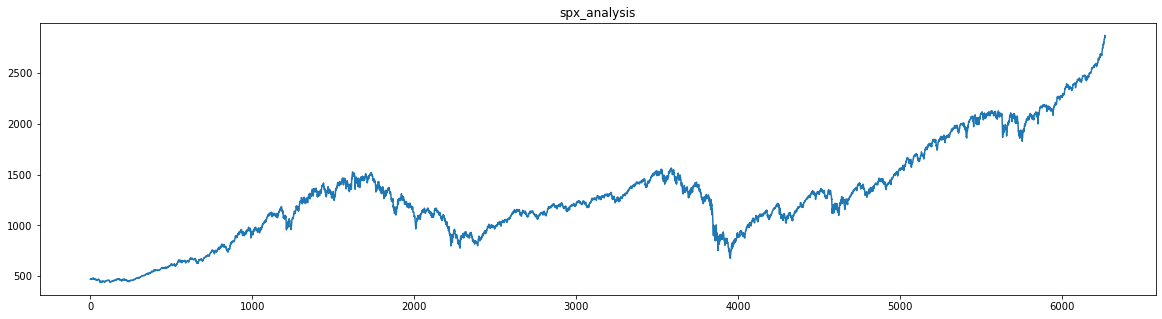

In [25]:
df['spx'].plot(figsize=(20,5), title= 'spx_analysis' )
plt.show()

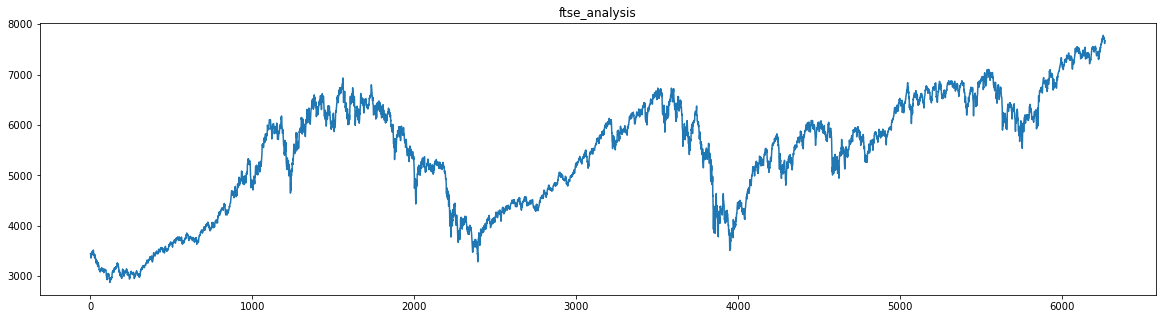

In [26]:
df['ftse'].plot(figsize=(20,5), title= 'ftse_analysis' )
plt.show()

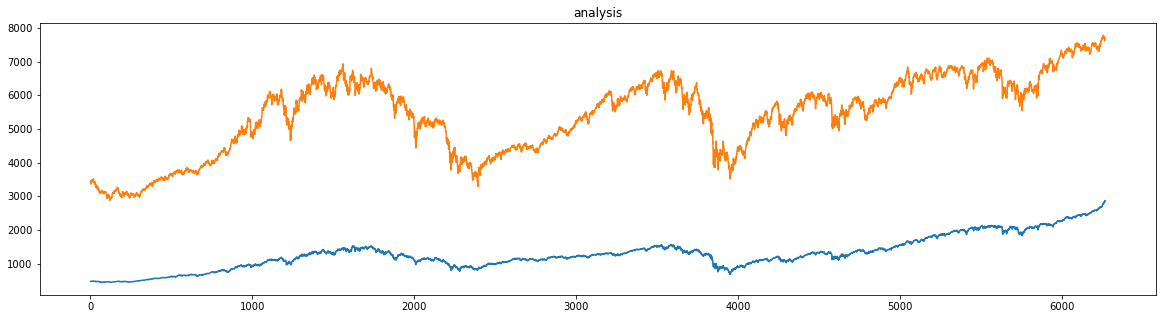

In [27]:
df['spx'].plot(figsize=(20,5))
df['ftse'].plot(figsize=(20,5))
plt.title('analysis')
plt.show()

## qq plot

In [28]:
import scipy.stats
import pylab

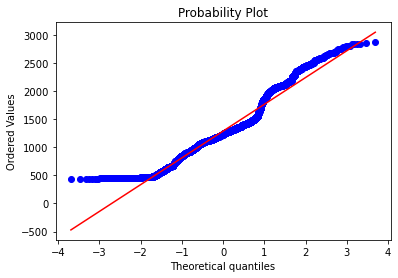

In [29]:
scipy.stats.probplot(df['spx'],plot=pylab)
pylab.show()

In [30]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [31]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [32]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [33]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [34]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [35]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [36]:
df['date'].describe()

<ipython-input-36-07e98f8ab9f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [37]:
df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [38]:
df.asfreq('b')

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [39]:
df=df.asfreq('b')

In [40]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## handling the missing values 

In [41]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [42]:
df['spx']=df['spx'].fillna(method='ffill')

In [43]:
df.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [44]:
df['ftse']=df['ftse'].fillna(method='bfill')

In [45]:
df.isnull().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [46]:
df['dax']=df['dax'].fillna(df['dax'].mean())

In [47]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

## deleting and creating the new column

In [48]:
df['market value']=df['spx']

In [49]:
del df['spx'], df['dax']

In [50]:
df.head()

,ftse,nikkei,market value
date,,,
1994-01-07,3445.98,18124.01,469.90
1994-01-10,3440.58,18443.44,475.27
1994-01-11,3413.77,18485.25,474.13
1994-01-12,3372.02,18793.88,474.17
1994-01-13,3360.01,18577.26,472.47


## splitting up the data

In [51]:
size=int(len(df)*0.8)

In [52]:
size

5021

In [53]:
df_train=df.iloc[:size]

In [54]:
df_test=df.iloc[size:]

In [55]:
df_train.tail()

,ftse,nikkei,market value
date,,,
2013-04-01,6411.74,12135.02,1562.173837
2013-04-02,6490.66,12003.43,1570.252238
2013-04-03,6420.28,12362.20,1553.686978
2013-04-04,6344.11,12634.54,1559.979316
2013-04-05,6249.77,12833.64,1553.278930


In [56]:
df_test.head()

,ftse,nikkei,market value
date,,,
2013-04-08,6276.94,13192.59,1563.071269
2013-04-09,6313.20,13192.35,1568.607909
2013-04-10,6387.37,13288.13,1587.731827
2013-04-11,6416.14,13549.16,1593.369863
2013-04-12,6384.39,13485.14,1588.854623


## white noise

In [57]:
wn=np.random.normal(loc=df['market value'].mean(),scale=df['market value'].std(), size=len(df))

In [58]:
df['wn']=wn

In [59]:
df.describe()

,ftse,nikkei,market value,wn
count,6277.000000,6269.000000,6277.000000,6277.000000
mean,5423.690398,14597.055700,1288.642547,1287.273086
std,1145.568370,4043.122953,487.868210,488.846205
min,2876.600000,7054.980000,438.920000,-566.771221
25%,4487.880000,10709.290000,992.715221,952.733232
50%,5663.300000,15028.170000,1233.761241,1291.335698
75%,6304.630175,17860.470000,1460.250000,1618.832189
max,7778.637689,24124.150000,2872.867839,3193.831274


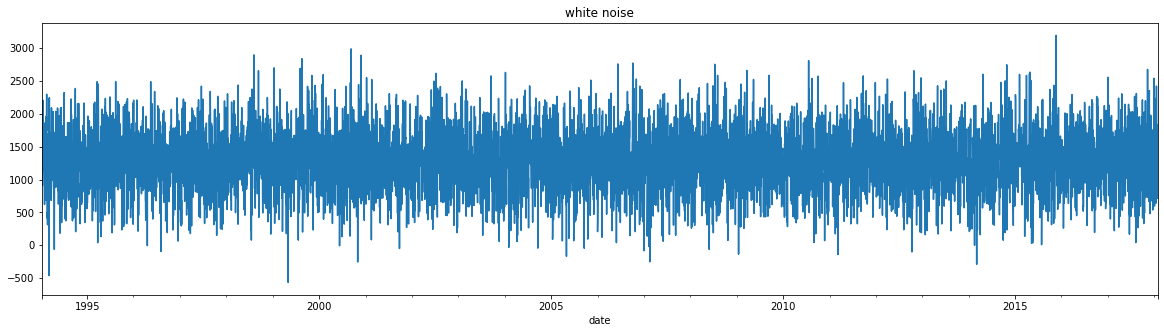

In [60]:
df.wn.plot(figsize=(20,5))
plt.title('white noise')
plt.show()

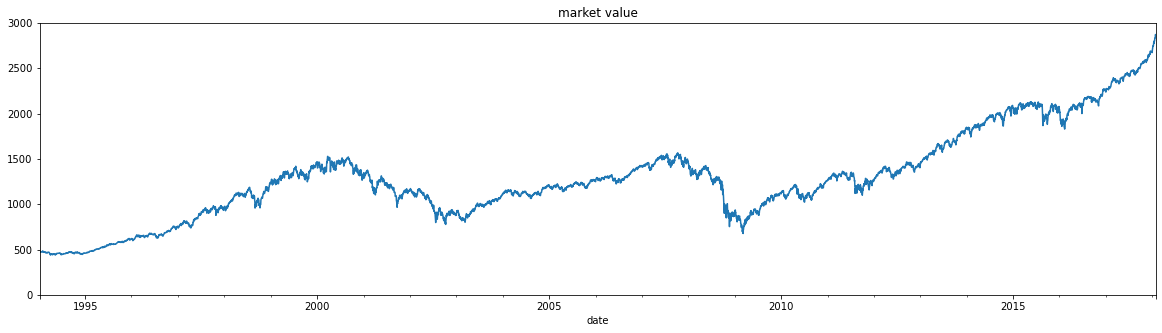

In [61]:
df['market value'].plot(figsize=(20,5))
plt.title('market value')
plt.ylim(0,3000)
plt.show()

## random walk

In [62]:
rw=pd.read_csv('RandWalk.csv')

In [63]:
rw.date=pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)
rw=rw.asfreq('b')

In [64]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [65]:
df['rw']=rw.price
df.head()

,ftse,nikkei,market value,wn,rw
date,,,,,
1994-01-07,3445.98,18124.01,469.90,1414.177128,1122.139662
1994-01-10,3440.58,18443.44,475.27,1912.594410,1080.347860
1994-01-11,3413.77,18485.25,474.13,1968.765280,1082.095245
1994-01-12,3372.02,18793.88,474.17,1322.790955,1083.639265
1994-01-13,3360.01,18577.26,472.47,905.326351,1067.146255


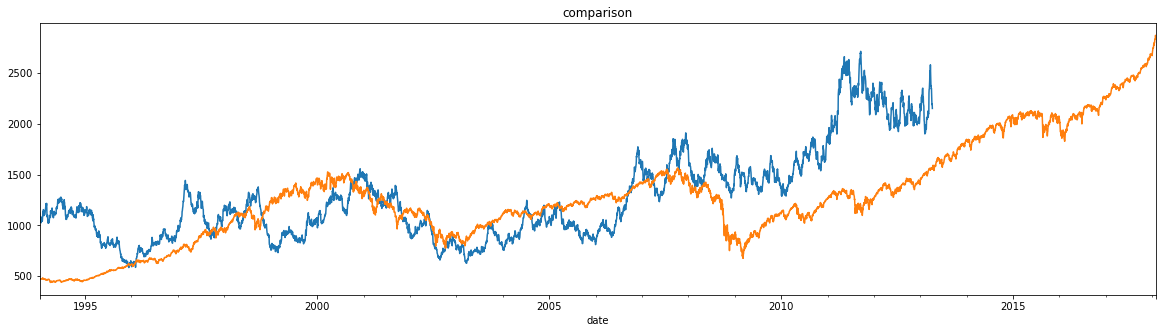

In [66]:
df.rw.plot(figsize=(20,5))
df['market value'].plot()
plt.title('comparison')
plt.show()

## stationarity

In [67]:
sts.adfuller(df['market value'])

(1.1194986381728411,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [68]:
sts.adfuller(df.wn)

(-79.78451785314873,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 95016.5299560287)

In [69]:
df.isnull().sum()

ftse               0
nikkei             8
market value       0
wn                 0
rw              1256
dtype: int64

In [70]:
df.rw=df.rw.fillna(method='ffill')

In [71]:
df.isnull().sum()

ftse            0
nikkei          8
market value    0
wn              0
rw              0
dtype: int64

In [72]:
## df test cant be applied if the column has null values, first we need to handle the missing values then apply df test for stationarity
sts.adfuller(df.rw)

(-1.3377157515360831,
 0.6117456205357743,
 24,
 6252,
 {'1%': -3.431396383066701,
  '5%': -2.8620024085488898,
  '10%': -2.5670161371235163},
 56526.358350839684)

## seasonality

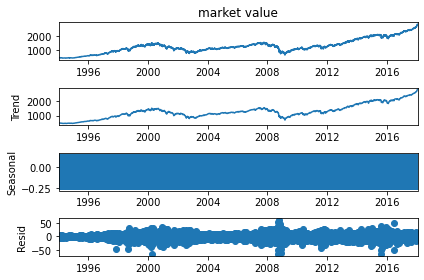

In [73]:
s_dec_additive=seasonal_decompose(df['market value'], model='additive')
s_dec_additive.plot()
plt.show()

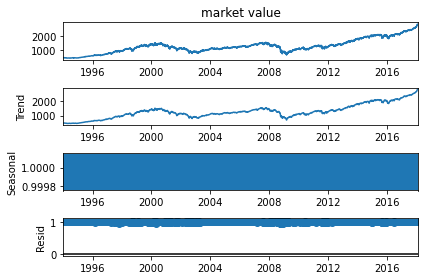

In [75]:
s_dec_multiplicative=seasonal_decompose(df['market value'], model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [56]:
## this prooves that there is no seasonality among market value prices

## ACF

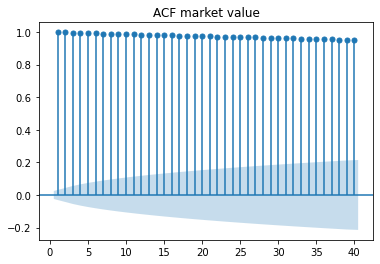

In [57]:
sgt.plot_acf(df['market value'],lags=40,zero=False)
plt.title('ACF market value')
plt.show()

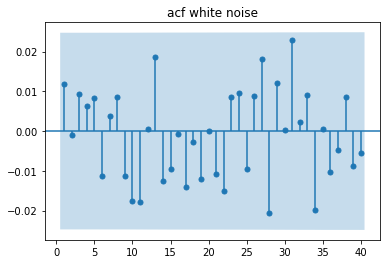

In [58]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title('acf white noise')
plt.show()

In [59]:
## lines lie within blue region that suggest there is no autocorrelation in white noise data

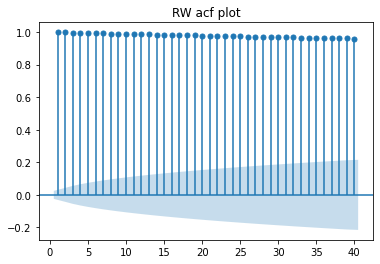

In [60]:
sgt.plot_acf(df.rw,lags=40,zero=False)
plt.title('RW acf plot')
plt.show()

## PACF

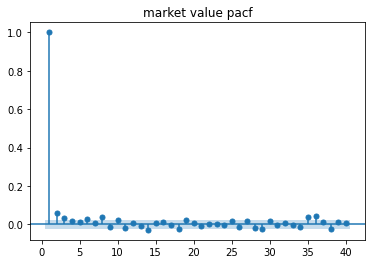

In [61]:
sgt.plot_pacf(df['market value'],lags=40,zero=False,method=('ols'))
plt.title('market value pacf')
plt.show()

In [62]:
##since most values after 3 perid are insignificant as the lie in blue region taht means there is no autocorrelation in market value pacf after 3 perid

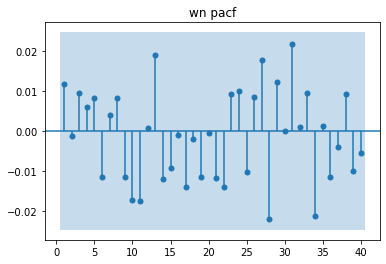

In [63]:
sgt.plot_pacf(df['wn'],lags=40,zero=False,method=('ols'))
plt.title('wn pacf')
plt.show()

In [64]:
##there is no autocorrelation(pacf) in white noise values as all values lie in blue region that makes it insignificant 

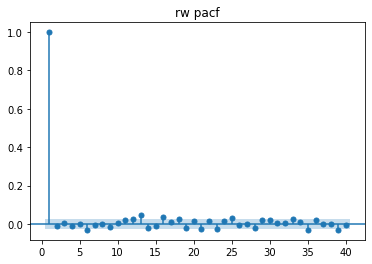

In [65]:
sgt.plot_pacf(df['rw'],lags=40,zero=False,method=('ols'))
plt.title('rw pacf')
plt.show()

In [66]:
df['spx']=df['market value']

In [67]:
df.head()

,ftse,nikkei,market value,wn,rw,spx
date,,,,,,
1994-01-07,3445.98,18124.01,469.90,677.445430,1122.139662,469.90
1994-01-10,3440.58,18443.44,475.27,730.244763,1080.347860,475.27
1994-01-11,3413.77,18485.25,474.13,1008.028434,1082.095245,474.13
1994-01-12,3372.02,18793.88,474.17,1692.176279,1083.639265,474.17
1994-01-13,3360.01,18577.26,472.47,708.143392,1067.146255,472.47


In [68]:
del df['market value']

In [69]:
df.head()

,ftse,nikkei,wn,rw,spx
date,,,,,
1994-01-07,3445.98,18124.01,677.445430,1122.139662,469.90
1994-01-10,3440.58,18443.44,730.244763,1080.347860,475.27
1994-01-11,3413.77,18485.25,1008.028434,1082.095245,474.13
1994-01-12,3372.02,18793.88,1692.176279,1083.639265,474.17
1994-01-13,3360.01,18577.26,708.143392,1067.146255,472.47


In [70]:
df['market_value']=df['ftse']
del df['ftse']

In [71]:
df.head()

,nikkei,wn,rw,spx,market_value
date,,,,,
1994-01-07,18124.01,677.445430,1122.139662,469.90,3445.98
1994-01-10,18443.44,730.244763,1080.347860,475.27,3440.58
1994-01-11,18485.25,1008.028434,1082.095245,474.13,3413.77
1994-01-12,18793.88,1692.176279,1083.639265,474.17,3372.02
1994-01-13,18577.26,708.143392,1067.146255,472.47,3360.01


## AR(1) Model

In [72]:
model_ar_1=ARMA(df.market_value,order=(1,0))
result_ar_1=model_ar_1.fit()
result_ar_1.summary()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34437.973
Method:                       css-mle   S.D. of innovations             58.378
Date:                Tue, 21 Dec 2021   AIC                          68881.945
Time:                        18:24:34   BIC                          68902.179
Sample:                    01-07-1994   HQIC                         68888.956
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5425.4223    659.857      8.222      0.000    4132.127    6718.718
ar.L1.market_value     0.9990      0.001   1714.155      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
-----------------------------------------------------------------------------
"""

## higher lag ar model

In [73]:
model_ar_2=ARMA(df.market_value,order=(2,0))
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.757
Method:                       css-mle   S.D. of innovations             58.376
Date:                Tue, 21 Dec 2021   AIC                          68883.514
Time:                        18:24:34   BIC                          68910.492
Sample:                    01-07-1994   HQIC                         68892.861
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    666.875      8.133      0.000    4116.640    6730.742
ar.L1.market_value     0.9907      0.013     78.772      0.000       0.966       1.015
ar.L2.market_value     0.0083      0.013      0.659      0.510      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -120.3989           +0.0000j          120.3989            0.5000
-----------------------------------------------------------------------------
"""

In [74]:
model_ar_3=ARMA(df.market_value,order=(3,0))
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.458
Method:                       css-mle   S.D. of innovations             58.308
Date:                Tue, 21 Dec 2021   AIC                          68870.917
Time:                        18:24:34   BIC                          68904.640
Sample:                    01-07-1994   HQIC                         68882.601
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    708.241      7.658      0.000    4035.564    6811.818
ar.L1.market_value     0.9903      0.013     78.924      0.000       0.966       1.015
ar.L2.market_value    -0.0394      0.018     -2.227      0.026      -0.074      -0.005
ar.L3.market_value     0.0482      0.013      3.823      0.000       0.023       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0914           -4.5516j            4.5525           -0.2532
AR.3           -0.0914           +4.5516j            4.5525            0.2532
-----------------------------------------------------------------------------
"""

In [75]:
model_ar_4=ARMA(df.market_value,order=(4,0))
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Tue, 21 Dec 2021   AIC                          68855.446
Time:                        18:24:35   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.9448    757.075      7.164      0.000    3940.105    6907.784
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value    -0.0374      0.018     -2.114      0.035      -0.072      -0.003
ar.L3.market_value    -0.0040      0.018     -0.225      0.822      -0.039       0.031
ar.L4.market_value     0.0527      0.013      4.183      0.000       0.028       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0287           -2.3012j            2.5206           -0.1831
AR.3            1.0287           +2.3012j            2.5206            0.1831
AR.4           -2.9825           -0.0000j            2.9825           -0.5000
-----------------------------------------------------------------------------
"""

## LLR test

In [76]:
def llr_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    P=chi2.sf(LR,DF).round(3)
    return P

## comparing higher lag-AR models

In [77]:
llr_test(model_ar_1,model_ar_2)

0.511

llr_test(model_ar_2,model_ar_3)

In [79]:
llr_test(model_ar_3,model_ar_4)

0.0

In [80]:
model_ar_4=ARMA(df.market_value,order=(4,0))
result_ar_4=model_ar_4.fit()
print(result_ar_4.summary())
print('LLR TEST :' + str(llr_test(model_ar_3,model_ar_4)))

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Tue, 21 Dec 2021   AIC                          68855.446
Time:                        18:24:37   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.9448    757.075      7.164      0.000    3940.105    6907.784
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value  

In [81]:
model_ar_5=ARMA(df.market_value,order=(5,0))
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print('LLR TEST :' + str(llr_test(model_ar_4,model_ar_5)))

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.466
Method:                       css-mle   S.D. of innovations             58.224
Date:                Tue, 21 Dec 2021   AIC                          68856.933
Time:                        18:24:38   BIC                          68904.145
Sample:                    01-07-1994   HQIC                         68873.291
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6910    748.544      7.246      0.000    3956.571    6890.811
ar.L1.market_value     0.9883      0.013     78.791      0.000       0.964       1.013
ar.L2.market_value  

In [82]:
model_ar_6=ARMA(df.market_value,order=(6,0))
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print('LLR TEST :' + str(llr_test(model_ar_5,model_ar_6)))

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -34416.799
Method:                       css-mle   S.D. of innovations             58.180
Date:                Tue, 21 Dec 2021   AIC                          68849.598
Time:                        18:24:40   BIC                          68903.555
Sample:                    01-07-1994   HQIC                         68868.293
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5781.9546    955.195      6.053      0.000    3909.808    7654.102
ar.L1.market_value     0.9886      0.012     79.235      0.000       0.964       1.013
ar.L2.market_value  

In [83]:
model_ar_7=ARMA(df.market_value,order=(7,0))
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print('LLR TEST :' + str(llr_test(model_ar_6,model_ar_7)))

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -34414.381
Method:                       css-mle   S.D. of innovations             58.158
Date:                Tue, 21 Dec 2021   AIC                          68846.761
Time:                        18:24:42   BIC                          68907.463
Sample:                    01-07-1994   HQIC                         68867.793
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    814.700      6.657      0.000    3826.908    7020.473
ar.L1.market_value     0.9876      0.012     79.036      0.000       0.963       1.012
ar.L2.market_value  

In [84]:
model_ar_8=ARMA(df.market_value,order=(8,0))
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print('LLR TEST :' + str(llr_test(model_ar_7,model_ar_8)))

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.345
Method:                       css-mle   S.D. of innovations             58.158
Date:                Tue, 21 Dec 2021   AIC                          68848.690
Time:                        18:24:46   BIC                          68916.136
Sample:                    01-07-1994   HQIC                         68872.059
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    811.071      6.687      0.000    3834.021    7013.361
ar.L1.market_value     0.9876      0.013     78.997      0.000       0.963       1.012
ar.L2.market_value  

In [85]:
print('llr test :'+str(llr_test(model_ar_1,model_ar_7,DF=6))) ##higher lags is used for non stationary data in time series, so higher "ar" models is used in non stationary data 

llr test :0.0


## the df test (for ftse value i.e. market_value)

In [86]:
sts.adfuller(df.market_value)

(-1.5988336219620523,
 0.4841793579044604,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

In [87]:
## p value is .48 and if p>.05 this prooves the presence of non stationarity and test statistics values are greater than critical value this also shows that data is non stationary

## using returns

In [88]:
df['returns']=df.market_value.pct_change(1).mul(100)
df=df.iloc[1:]

In [89]:
## since test statistics is very less than the critical values so we can say that time series is stationary in nature

## plotting ACF and PACF for returns

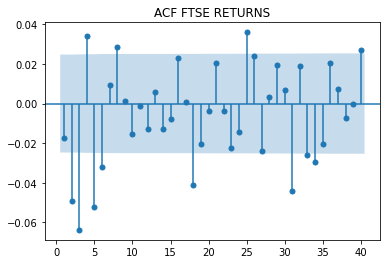

In [90]:
sgt.plot_acf(df.returns[1:],lags=40,zero=False)
plt.title('ACF FTSE RETURNS')
plt.show()

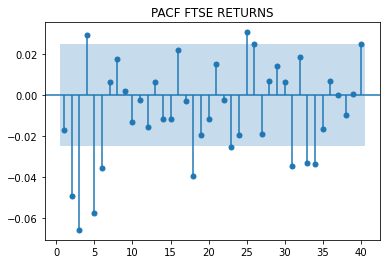

In [91]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=('ols'))
plt.title('PACF FTSE RETURNS')
plt.show()

## analysing residuals

In [92]:
df['res_price']=model_ar_7.fit().resid

In [93]:
df.res_price.mean()

0.7921103298577428

In [94]:
df.res_price.var()

3381.766158081482

In [95]:
sts.adfuller(df.res_price)

(-79.22250594741773,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 68455.6428523947)

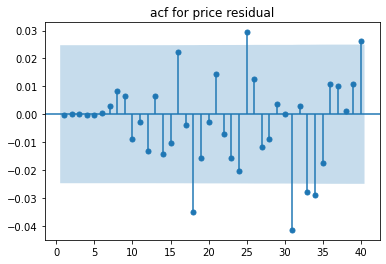

In [96]:
sgt.plot_acf(df.res_price,zero=False,lags=40)
plt.title('acf for price residual')
plt.show()